In [ ]:
# dependencies

import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

from src.data_analysis.query_accuracy import query_accuracy

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 8]
plt.style.use("ggplot")

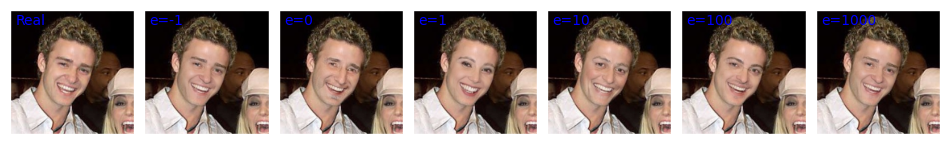

In [ ]:
potential_faces = glob.glob("Datasets//lfw//**//*.jpg", recursive=True)
face_real_path = potential_faces[np.random.randint(len(potential_faces))]

face_storage = []
real_img = cv2.imread(face_real_path)
real_img = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)
face_storage.append((real_img, "Real"))

for eps in [-1, 0, 1, 10, 100, 1000, 10000]:
    dataset_name = f"lfw_eps{eps}_theta0"
    current_path = face_real_path.replace(
        "Datasets//lfw", f"Anonymized Datasets//{dataset_name}"
    )

    try:
        face_img = cv2.imread(current_path)
        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
        face_storage.append((face_img, f"e={eps}"))
    except Exception as e:
        print(f"Warning: {eps} not found, {e}.")

fig = plt.figure(figsize=(12, 16))
grid_size = (1, 7)
grid = ImageGrid(
    fig,
    111,  # similar to subplot(111)
    nrows_ncols=grid_size,  # creates 2x2 grid of axes
    axes_pad=0.1,  # pad between axes in inch.
)

while len(face_storage) < grid_size[0] * grid_size[1]:
    face_storage.append((np.zeros_like(face_storage[0][0]), -1))

for i, (ax, (im, suf)) in enumerate(zip(grid, face_storage)):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.text(10, 30, suf, color="b")
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

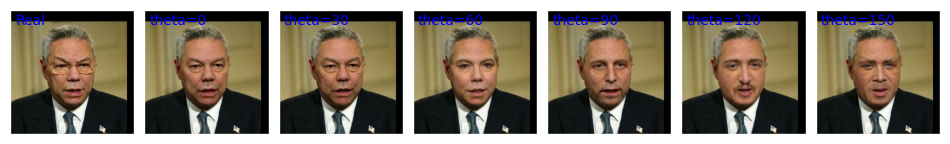

In [ ]:
potential_faces = glob.glob("Datasets//lfw//**//*.jpg", recursive=True)
face_real_path = potential_faces[np.random.randint(len(potential_faces))]

face_storage = []
real_img = cv2.imread(face_real_path)
real_img = cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB)
face_storage.append((real_img, "Real"))

for theta in [0, 30, 60, 90, 120, 150, 180]:
    dataset_name = f"lfw_eps-1_theta{theta}"
    current_path = face_real_path.replace(
        "Datasets//lfw", f"Anonymized Datasets//{dataset_name}"
    )

    try:
        face_img = cv2.imread(current_path)
        face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
        face_storage.append((face_img, f"theta={theta}"))
    except Exception as e:
        print(f"Warning: {theta} not found, {e}.")

fig = plt.figure(figsize=(12, 16))
grid_size = (1, 7)
grid = ImageGrid(
    fig,
    111,  # similar to subplot(111)
    nrows_ncols=grid_size,  # creates 2x2 grid of axes
    axes_pad=0.1,  # pad between axes in inch.
)

while len(face_storage) < grid_size[0] * grid_size[1]:
    face_storage.append((np.zeros_like(face_storage[0][0]), -1))

for i, (ax, (im, suf)) in enumerate(zip(grid, face_storage)):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.text(10, 30, suf, color="b")
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

[0.9780082156096583, 0.1496343051798417, 0.15374211000901714, 0.17533313295260997, 0.5066125638713556, 0.9767057409077247]


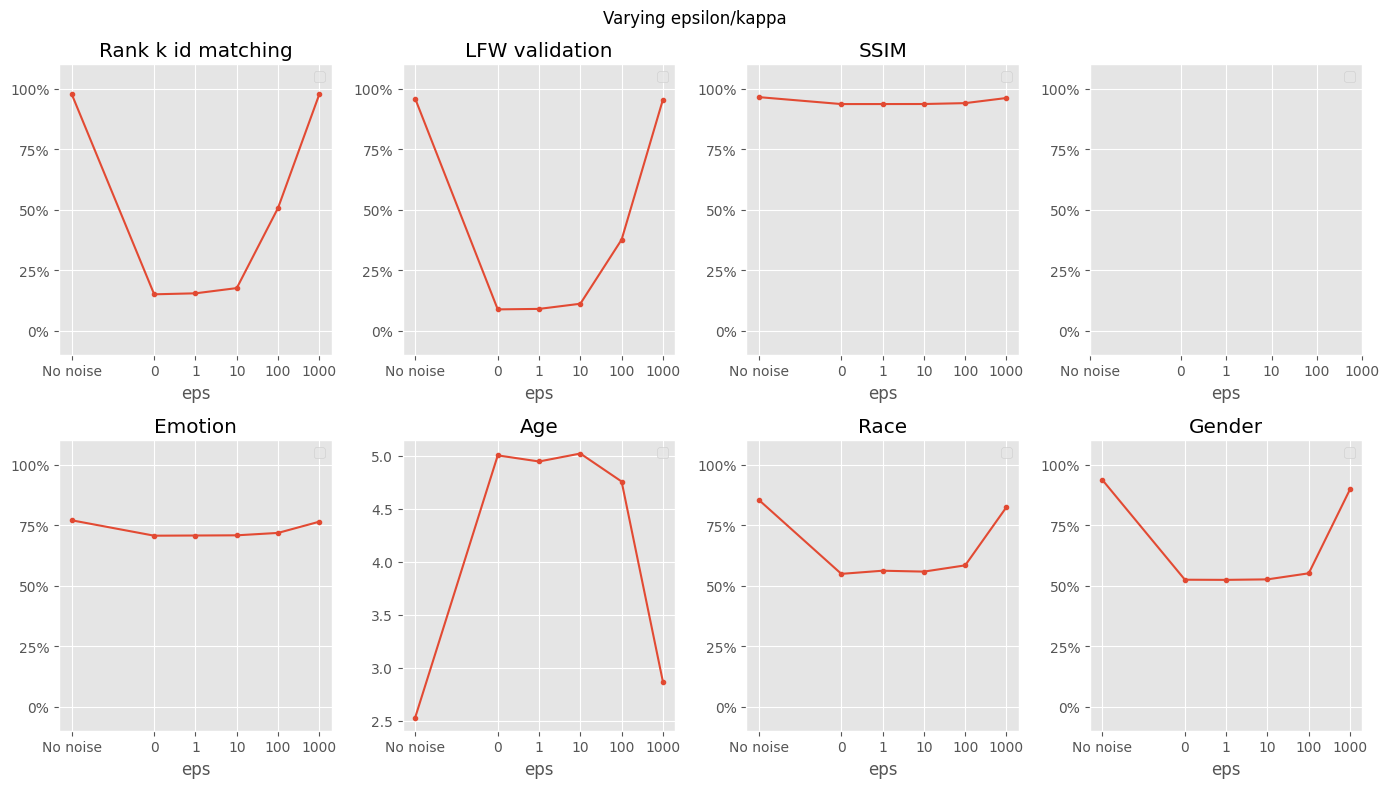

In [ ]:
fig, ax = plt.subplots(2, 4)

# having to find the actual number of entries in CelebA's test set
celeba_paths = glob.glob("Datasets//CelebA_test//**//*.jpg", recursive=True)
denom = len(celeba_paths)

rank_k_accs, val_accs, ssim_accs, emotion_accs, age_accs, gender_accs, race_accs = (
    [],
    [],
    [],
    [],
    [],
    [],
    [],
)

x_values = [-1, 1, 2, 3, 4, 5]
eps_values = [-1, 0, 1, 10, 100, 1000]
for eps in eps_values:
    suf = f"eps{eps}_theta0"

    try:
        rank_k_accuracies = query_accuracy(
            "rank_k",
            dataset="CelebA_test",
            p_mech_suffix=suf,
            mode="mean",
            denominator=denom,
        )
        rank_k_accs.append(rank_k_accuracies["1"])
    except Exception as e:
        print(e)
        rank_k_accs.append(0)

    try:
        val_acc = query_accuracy(
            "lfw_validation",
            dataset="lfw",
            p_mech_suffix=suf,
            mode="mean",
            denominator=3000,
        )
        val_accs.append(val_acc)
    except Exception:
        val_accs.append(0)

    try:
        util_acc = query_accuracy(
            "utility",
            dataset="CelebA_test",
            p_mech_suffix=suf,
            mode="mean",
            denominator=denom,
        )
        ssim_accs.append(util_acc["ssim"])
        emotion_accs.append(util_acc["emotion"])
        age_accs.append(util_acc["age"])
        gender_accs.append(util_acc["gender"])
        race_accs.append(util_acc["race"])
    except Exception:
        ssim_accs.append(0)
        emotion_accs.append(0)
        age_accs.append(0)
        gender_accs.append(0)
        race_accs.append(0)

print(rank_k_accs)

ax[0, 0].plot(x_values, rank_k_accs, marker=".")
ax[0, 1].plot(x_values, val_accs, marker=".")
ax[0, 2].plot(x_values, ssim_accs, marker=".")

ax[1, 0].plot(x_values, emotion_accs, marker=".")
ax[1, 1].plot(x_values, age_accs, marker=".")
ax[1, 2].plot(x_values, race_accs, marker=".")
ax[1, 3].plot(x_values, gender_accs, marker=".")


fig.suptitle("Varying epsilon/kappa")
ax[0, 0].set_title("Rank k id matching")
ax[0, 1].set_title("LFW validation")
ax[0, 2].set_title("SSIM")
# ax[0, 3].set_title("Validation on CelebA")
ax[1, 0].set_title("Emotion")
ax[1, 1].set_title("Age")
ax[1, 2].set_title("Race")
ax[1, 3].set_title("Gender")

for i in range(8):
    ii = i // 4
    jj = i % 4

    ax[ii, jj].set_xticks(
        x_values, ["No noise" if z == -1 else f"{z}" for z in eps_values]
    )

    if i != 5:
        ax[ii, jj].set_ylim([-0.1, 1.1])
        ax[ii, jj].set_yticks(
            [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"]
        )
    ax[ii, jj].set_xlabel("eps")
    ax[ii, jj].legend()

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

[0.9780082156096583, 0.977557358982066, 0.937932070934776, 0.1463781184250075, 0.001302474701933674, 0.0003506662659052199, 0.0004508566275924256]


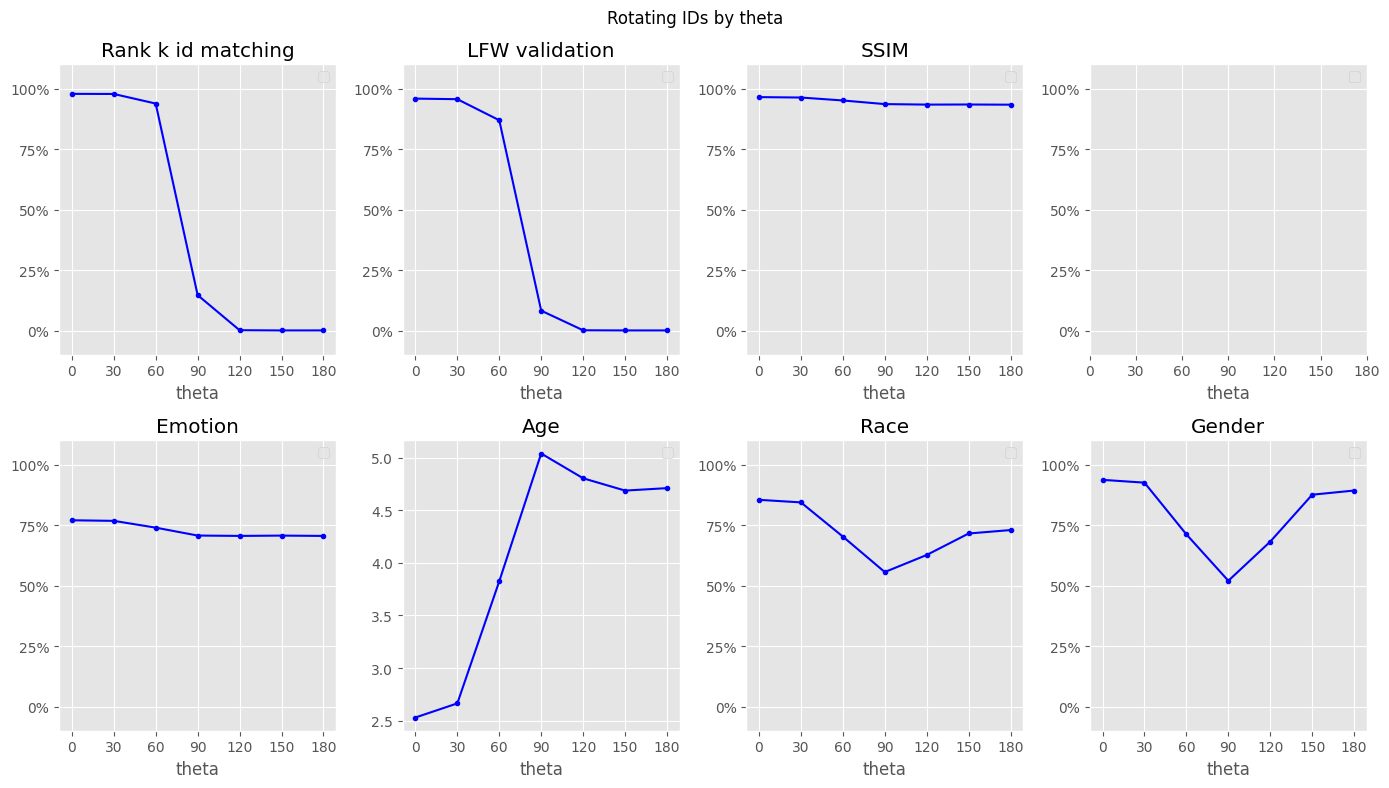

In [ ]:
fig, ax = plt.subplots(2, 4)

# having to find the actual number of entries in CelebA's test set
celeba_paths = glob.glob("Datasets//CelebA_test//**//*.jpg", recursive=True)
denom = len(celeba_paths)

rank_k_accs, val_accs, ssim_accs, emotion_accs, age_accs, gender_accs, race_accs = (
    [],
    [],
    [],
    [],
    [],
    [],
    [],
)

x_values = [0, 30, 60, 90, 120, 150, 180]
theta_values = [0, 30, 60, 90, 120, 150, 180]
for theta in theta_values:
    suf = f"eps-1_theta{theta}"

    try:
        rank_k_accuracies = query_accuracy(
            "rank_k",
            dataset="CelebA_test",
            p_mech_suffix=suf,
            mode="mean",
            denominator=denom,
        )
        rank_k_accs.append(rank_k_accuracies["1"])
    except Exception as e:
        print(e)
        rank_k_accs.append(0)

    try:
        val_acc = query_accuracy(
            "lfw_validation",
            dataset="lfw",
            p_mech_suffix=suf,
            mode="mean",
            denominator=3000,
        )
        val_accs.append(val_acc)
    except Exception:
        val_accs.append(0)

    try:
        util_acc = query_accuracy(
            "utility",
            dataset="CelebA_test",
            p_mech_suffix=suf,
            mode="mean",
            denominator=denom,
        )
        ssim_accs.append(util_acc["ssim"])
        emotion_accs.append(util_acc["emotion"])
        age_accs.append(util_acc["age"])
        gender_accs.append(util_acc["gender"])
        race_accs.append(util_acc["race"])
    except Exception:
        ssim_accs.append(0)
        emotion_accs.append(0)
        age_accs.append(0)
        gender_accs.append(0)
        race_accs.append(0)

print(rank_k_accs)

ax[0, 0].plot(x_values, rank_k_accs, marker=".", color="blue")
ax[0, 1].plot(x_values, val_accs, marker=".", color="blue")
ax[0, 2].plot(x_values, ssim_accs, marker=".", color="blue")

ax[1, 0].plot(x_values, emotion_accs, marker=".", color="blue")
ax[1, 1].plot(x_values, age_accs, marker=".", color="blue")
ax[1, 2].plot(x_values, race_accs, marker=".", color="blue")
ax[1, 3].plot(x_values, gender_accs, marker=".", color="blue")


fig.suptitle("Rotating IDs by theta")
ax[0, 0].set_title("Rank k id matching")
ax[0, 1].set_title("LFW validation")
ax[0, 2].set_title("SSIM")
# ax[0, 3].set_title("Validation on CelebA")
ax[1, 0].set_title("Emotion")
ax[1, 1].set_title("Age")
ax[1, 2].set_title("Race")
ax[1, 3].set_title("Gender")

for i in range(8):
    ii = i // 4
    jj = i % 4

    ax[ii, jj].set_xticks(x_values, [f"{z}" for z in theta_values])

    if i != 5:
        ax[ii, jj].set_ylim([-0.1, 1.1])
        ax[ii, jj].set_yticks(
            [0, 0.25, 0.5, 0.75, 1], ["0%", "25%", "50%", "75%", "100%"]
        )
    ax[ii, jj].set_xlabel("theta")
    ax[ii, jj].legend()

plt.tight_layout()
plt.show()